## 🔷 Let's take a look at how to perform EDA and feature engineering for this dataset! 📖🔬

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')
colors = ['#1F77B4', '#AEC7E8', '#FF7F0E', '#FFBB78', '#2CA02C', '#98DF8A']
sns.set(style="whitegrid")

In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s5e2/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e2/test.csv")
ss = pd.read_csv("/kaggle/input/playground-series-s5e2/sample_submission.csv")
train_extra = pd.read_csv("/kaggle/input/playground-series-s5e2/sample_submission.csv")

In [3]:
display(train.head())

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [4]:
display(train.info())

print()
print("############################")
print()

display(train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


None


############################



id                         0
Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64

### 🔷 Looks like there's some missing data, let's take a closer look at that! 🔎

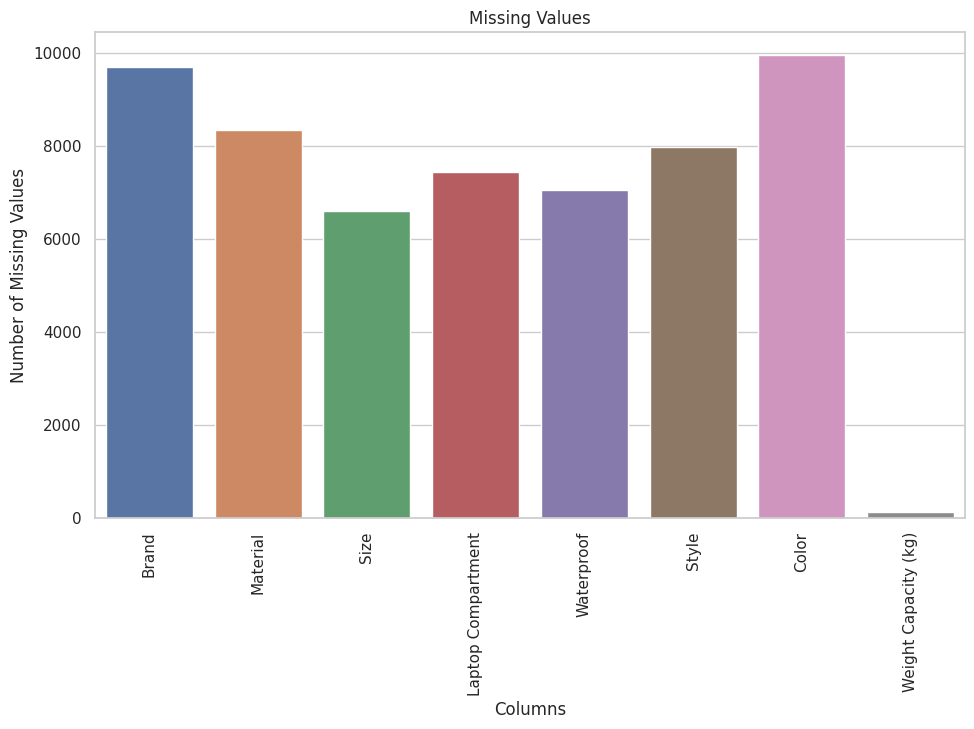

In [5]:
missing = train.isnull().sum()
missing = missing[missing > 0] 

if not missing.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing.index, y=missing.values)
    plt.title('Missing Values')
    plt.xlabel('Columns')
    plt.ylabel('Number of Missing Values')
    plt.xticks(rotation=90)
    plt.show()

## 🔷 Exploring the data & addressing the missing values 📊

There are two types of data :
1. Categorical - Contains discrete values that represent different groups or categories.
   * Brand
   * Material
   * Size
   * Compartments
   * Laptop Compartment
   * Waterproof
   * Style
   * Color

and

2. Numerical - Contains numbers and mathematical operations can be performed on them.
   * Weight Capacity (kg)
   * Price

The above analysis reveals that there are many missing values (NaN) in the data. We handle the missing values in the case of numerical and categorial data differently. 

## 🔷 Let's look at the numerical ones first 📈

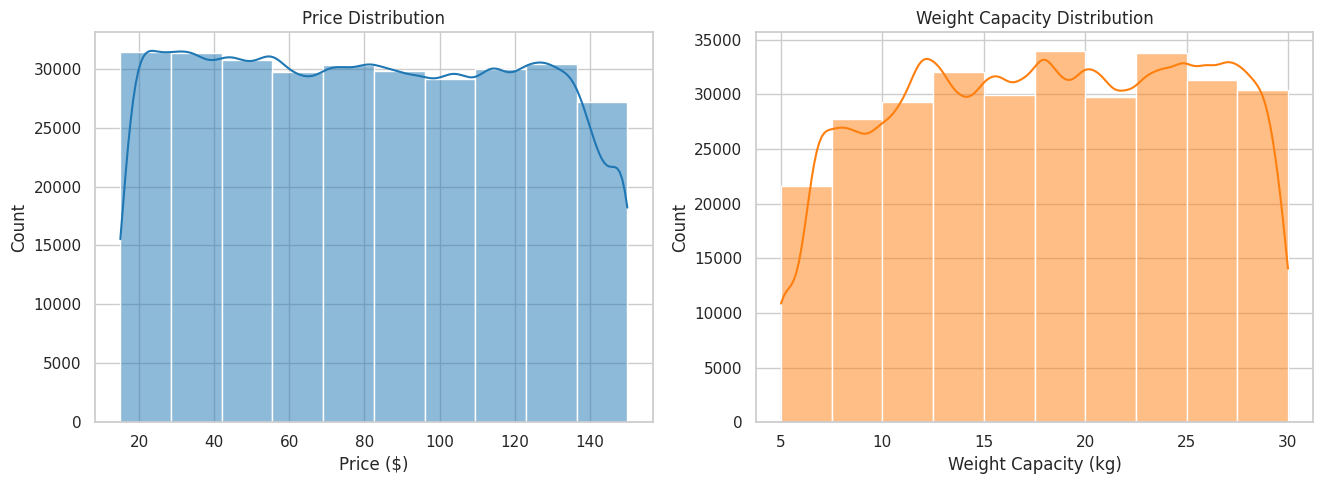

In [6]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.histplot(train["Price"], bins=10, kde=True, color=colors[0])
plt.title("Price Distribution")
plt.xlabel("Price ($)")

plt.subplot(1, 3, 2)
sns.histplot(train["Weight Capacity (kg)"], bins=10, kde=True, color=colors[2])
plt.title("Weight Capacity Distribution")
plt.xlabel("Weight Capacity (kg)")

plt.tight_layout()
plt.show()

## 🔷 Checking for outliers in the numerical columns 🔎

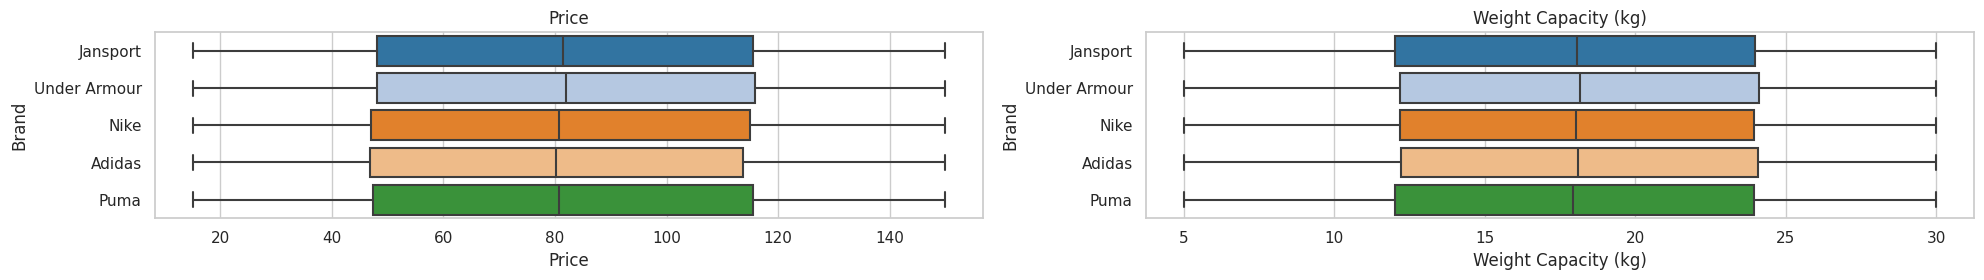

In [7]:
cols = ["Price", "Weight Capacity (kg)"]
plt.figure(figsize=(20, 5))
for i , col in enumerate(cols,1):
    plt.subplot(2,2,i)
    sns.boxplot(x=col, y = "Brand", data=train, palette=colors)
    plt.title(col)
    plt.tight_layout()

### There don't seem to be any outliers here 😄

## 🔷 Let's now take a look at the categorical columns and check for outliers 📉

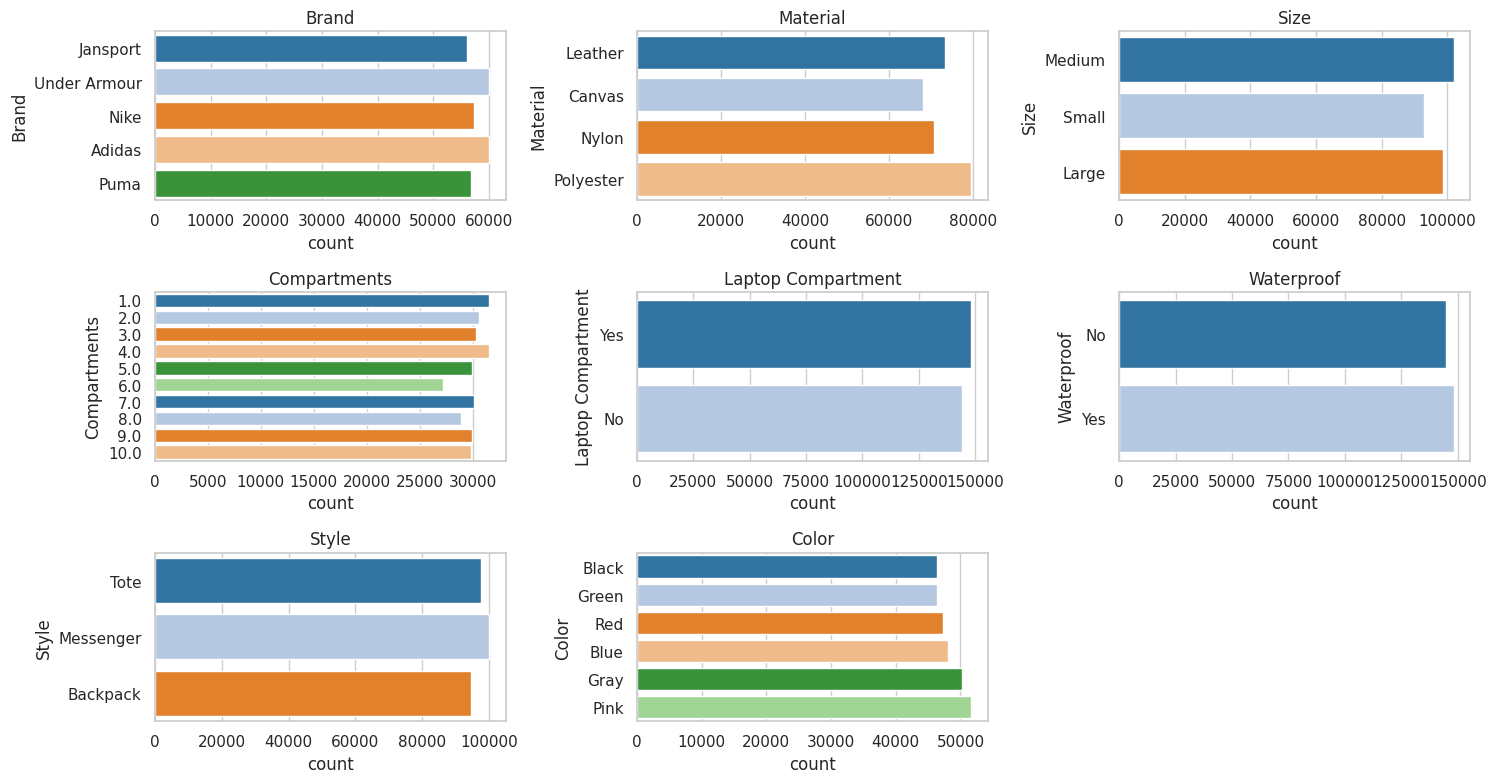

In [8]:
cols =  ["Brand", "Material", "Size", "Compartments", "Laptop Compartment", "Waterproof", "Style", "Color"]
plt.figure(figsize=(15,8))
for i ,col in enumerate(cols ,1):
    plt.subplot(3,3,i)
    sns.countplot(y=col, data=train, palette=colors)
    plt.title(col)
    
plt.tight_layout()
plt.show()

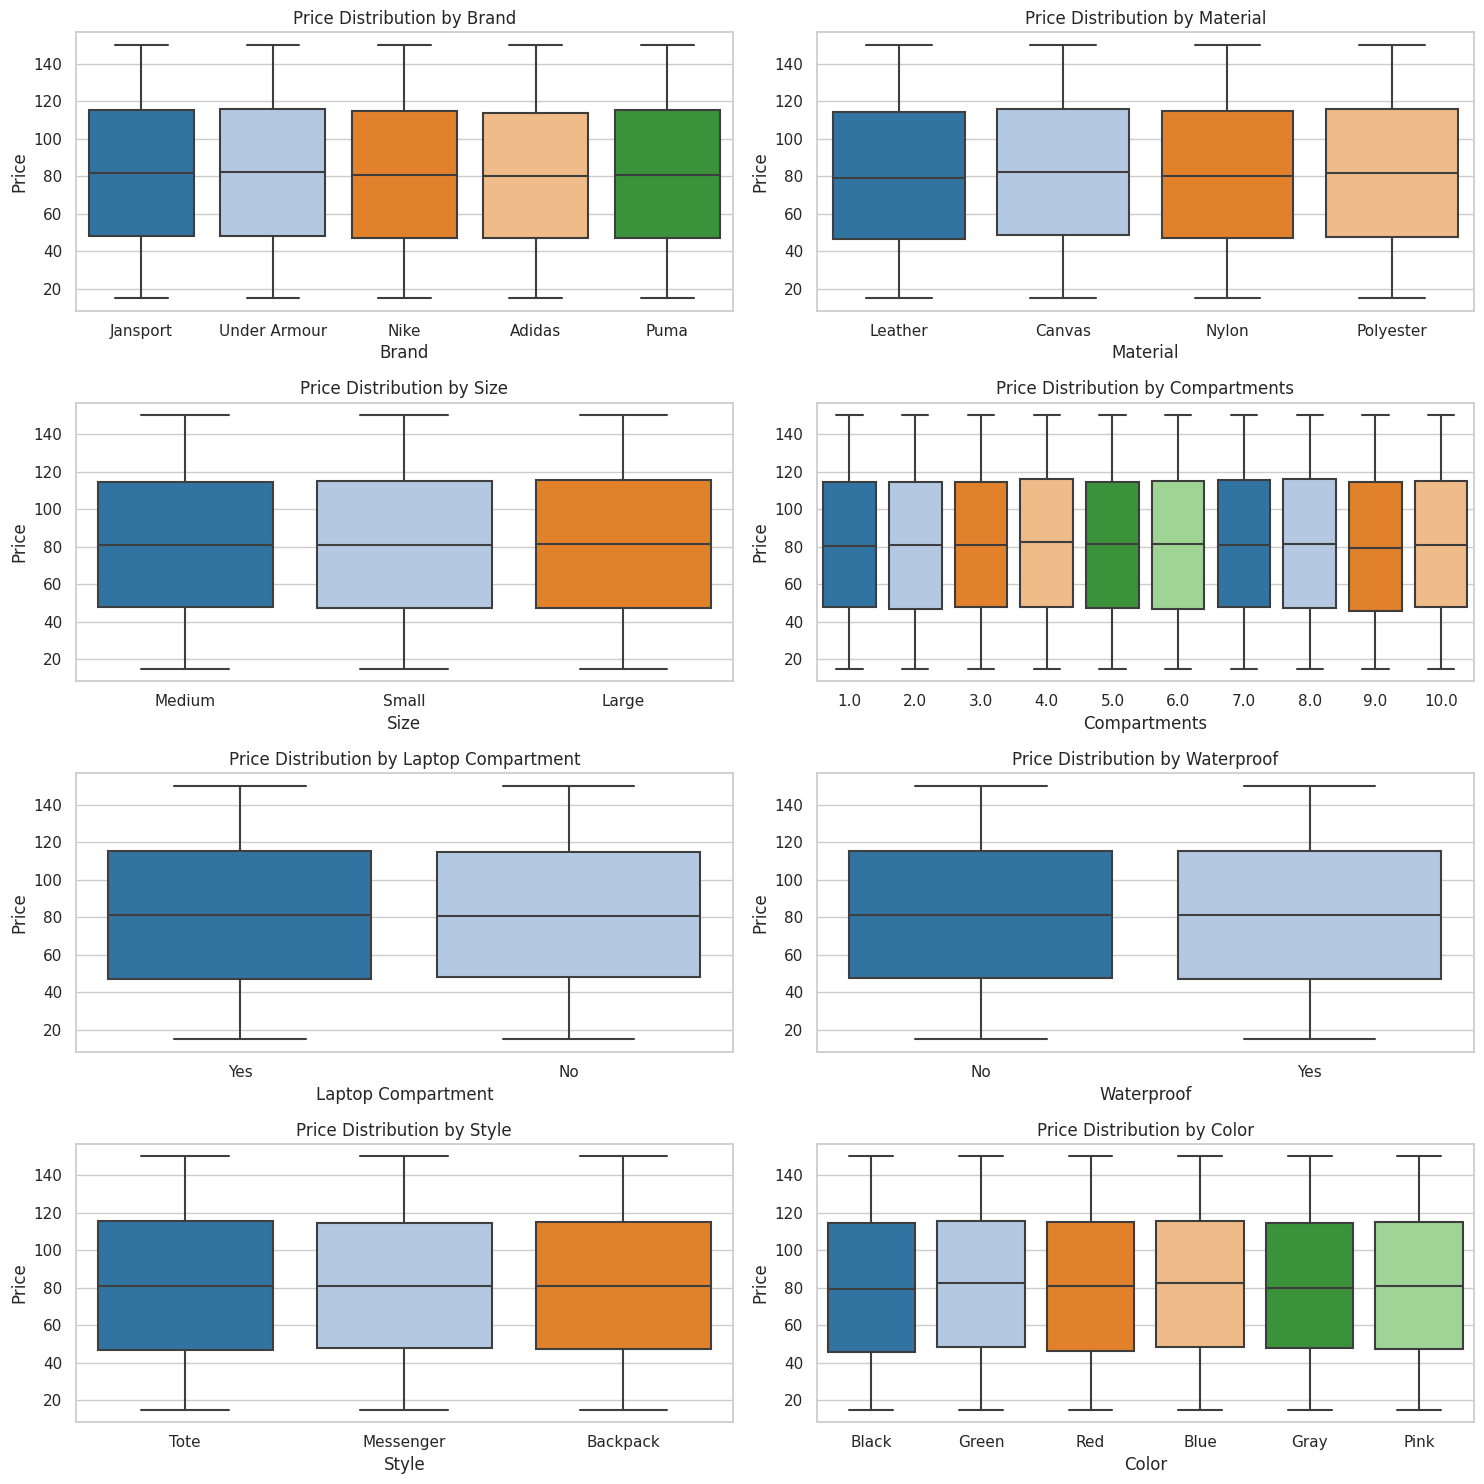

In [9]:
plt.figure(figsize=(15, 15))

for i, col in enumerate(cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=train[col], y=train["Price"], palette=colors)
    plt.ylabel("Price")
    plt.title(f"Price Distribution by {col}")

plt.tight_layout()

### The same is true for the categorical variables as well! 😄

### 🔷 Dealing with the missing values and feature engineering! ⚙️

In [10]:
train.drop(columns=['id'], inplace=True)
test.drop(columns=['id'], inplace=True)

In [11]:
def feature_engineering(df):
    size_mapping = {'Small': 1, 'Medium': 2, 'Large': 3}
    df['Size_Num'] = df['Size'].map(size_mapping)
    df['Compartments_per_Size'] = df['Compartments'] / df['Size_Num']    
    df['Weight_per_Compartment'] = df['Weight Capacity (kg)'] / df['Compartments'] 
    df['Waterproof'] = df['Waterproof'].map({'Yes': 1, 'No': 0})
    df['Laptop Compartment'] = df['Laptop Compartment'].map({'Yes': 1, 'No': 0})
    df['Waterproof_Laptop'] = df['Waterproof'] * df['Laptop Compartment']
    df['Is_Durable_Material'] = df['Material'].apply(lambda x: 1 if x in ['Leather', 'Nylon'] else 0)
    df['Is_Lightweight_Material'] = df['Material'].apply(lambda x: 1 if x in ['Canvas', 'Nylon'] else 0)
    df['Luxury_Material'] = df['Material'].apply(lambda x: 1 if x == 'Leather' else 0)
    df['Professional_Style'] = df['Style'].apply(lambda x: 1 if x in ['Messenger', 'Tote'] else 0)
    df['Casual_Style'] = df['Style'].apply(lambda x: 1 if x in ['Backpack', 'Duffle'] else 0)
    df['Is_Premium_Brand'] = df['Brand'].apply(lambda x: 1 if x in ['Nike', 'Under Armour', 'Adidas'] else 0)
    df['Is_Budget_Brand'] = df['Brand'].apply(lambda x: 1 if x == 'Jansport' else 0)
    df['Is_Small'] = df['Size'].apply(lambda x: 1 if x == 'Small' else 0)
    df['Is_Medium'] = df['Size'].apply(lambda x: 1 if x == 'Medium' else 0)
    df['Is_Large'] = df['Size'].apply(lambda x: 1 if x == 'Large' else 0)

    return df

train = feature_engineering(train)
test = feature_engineering(test)

In [12]:
train[cols] = train[cols].fillna('None').astype('string').astype('category')
median_weight = train['Weight Capacity (kg)'].median()
train['Weight Capacity (kg) categorical'] = train['Weight Capacity (kg)'].fillna(median_weight).astype('string')
train['Weight Capacity (kg)'] = train['Weight Capacity (kg)'].fillna(median_weight).astype('float64')

test[cols] = test[cols].fillna('None').astype('string').astype('category')
test['Weight Capacity (kg) categorical'] = test['Weight Capacity (kg)'].fillna(median_weight).astype('string')
test['Weight Capacity (kg)'] = test['Weight Capacity (kg)'].fillna(median_weight)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column                            Non-Null Count   Dtype   
---  ------                            --------------   -----   
 0   Brand                             300000 non-null  category
 1   Material                          300000 non-null  category
 2   Size                              300000 non-null  category
 3   Compartments                      300000 non-null  category
 4   Laptop Compartment                300000 non-null  category
 5   Waterproof                        300000 non-null  category
 6   Style                             300000 non-null  category
 7   Color                             300000 non-null  category
 8   Weight Capacity (kg)              300000 non-null  float64 
 9   Price                             300000 non-null  float64 
 10  Size_Num                          293405 non-null  float64 
 11  Compartments_per_Size             29340